In [1]:
# Tutorial: "A tour of Data Assimilation methods"
# Model: Lorenz-63
# DA Methods: Nudging, 3D-Var, 4D-Var, Particle Filter, EnKF, Hybrid
import pickle
import numpy as np
from class_lorenz63_mdl import LORENZ63
from class_state_vec import state_vector
from class_obs import obs_da
from class_da_sys import da_system
import copy
from copy import deepcopy
import random
import sys
import math
import matplotlib.pyplot as plt
from scipy import ndimage

#-----------------------------------------------------------------------
# Read the da system object
#-----------------------------------------------------------------------
name = 'x_analysis'
infile = name+'_init.pkl'
das = da_system()
das = das.load(infile)#         
print(das)
#-----------------------------------------------------------------------
# Initialize the ensemble
#-----------------------------------------------------------------------
xa = das.x0
#random.seed(2)
Xa = das.initEns(xa,mu=das.ens_bias_init,sigma=das.ens_sigma_init,edim=das.edim, separate = 'no')

print('ensemble dimension = ')
print(das.edim)
print('initial bias = ')
print(das.ens_bias_init)
print('initial standard deviation = ')
print(das.ens_sigma_init)
print('X0 = ')
print(Xa)

#-----------------------------------------------------------------------
# Get the nature run trajectory
#-----------------------------------------------------------------------
sv = das.getStateVector()
x_nature = sv.getTrajectory()  

#-----------------------------------------------------------------------
# Get the S-I1-I2-R observations via the obs_da object
#-----------------------------------------------------------------------
obs = das.getObsData()
y_obs = obs.getVal()
y_pts = obs.getPos()
y_err = obs.getErr()


#-----------------------------------------------------------------------
# Initialize the timesteps
#-----------------------------------------------------------------------
t_nature = sv.getTimes()

acyc_step = das.acyc_step  # (how frequently to perform an analysis)
dtau = das.dtau
dt_output = das.dt
fcst_step= das.fcst_step
fcst_dt = das.fcst_dt
maxit = das.maxit
xdim = das.xdim
ydim = das.ydim
#maxit = 141000
#-----------------------------------------------------------------------
# Choose DA method:
#-----------------------------------------------------------------------
#das.setMethod('EnKF')
method = das.getMethod() 

#-----------------------------------------------------------------------
# Conduct data assimilation process
#-----------------------------------------------------------------------
#
DA_count = 0
yo_hos = 0
flag = True
xa_history = np.hstack((np.zeros([maxit,das.xdim]),np.zeros([maxit,das.xdim])))
xa_history[:] = np.nan
KH_history = []
KH_idx = []


Xa_history = np.zeros([maxit, das.xdim, das.edim])
Xf_history = np.zeros([maxit, das.xdim, das.edim])

Xa_history[0,:,:] = Xa
#you don't need to repeat this, begin
'''
for i in range(0,maxit-acyc_step,acyc_step):

  #----------------------------------------------
  # Run forecast model for this analysis cycle:
  #----------------------------------------------
  # to fix a small problem with float number in Python
  
  t = np.arange(i*0.01, i*0.01 + 0.01* (acyc_step)+0.00005, 0.01)
  

  #for s in range(len(t)):
  #  t[s] = int(100*(t[s] / 20)+0.1)/100 
  #print('length of t = ', len(t))
  #print('t = ', t)
  t_output = t
  #print(t_output)
  #for s in range(len(t_output)):
  #  t_output[s] = int(100*(t_output[s] / 20)+0.1)/100 
  #print('length of t_output = ', len(t_output))
  #print('t_output = ', t_output)
    
  #----------------------------------------------
  # Get the observations for this analysis cycle
  #----------------------------------------------
  yo = y_obs[:, i+acyc_step]
  yp = y_pts[:, i+acyc_step]
    

  # Run the model ensemble forecast
  Xf = np.zeros_like(Xa) # #states * edim
  
  xf_4d = 0
  smd = LORENZ63(sigma = 10.0, beta = 8.0/3.0, rho = 28.0)
  xf_4d_box= np.zeros((das.edim, das.xdim, len(t_output)))
  #xf_4d_comp = np.zeros((len(t),das.xdim))
  for k in range(das.edim):
    xf_4d_k = smd.run(Xa[:,k].A1, t, t_output) # A1:flatten the kth column of Xa
    xf_4d_k = xf_4d_k.y # xdim * #(t_output)
    #print('xf_4d_k = ', np.shape(xf_4d_k))
    xf_4d_box[k,:,:] = xf_4d_k    
    
    # Get last timestep of the forecast
    Xf[:,k] = np.matrix(xf_4d_k[:,-1]).T
  
  #for k in range(das.edim):
        #Xf_history[i+1:i+acyc_step+1,:,k] = xf_4d_box[k,:,1:].T
  Xf_history[i+acyc_step,:,:] = Xf


  #----------------------------------------------
  # Compute analysis_state
  #----------------------------------------------
  
  
  Xa, KH = das.compute_analysis(Xf,yo)   # (#state+#para) * (#esemble)
  

  Xa_history[i+acyc_step,:,:] = Xa
  xa = np.mean(Xa,axis=1)
  xa = xa.T
  #print('xa = ', xa) 

  Xa_sd_comp = np.zeros((das.xdim,1))
  Xa_sd_comp =  np.std(Xa, axis = 1).T

  xa_history[i+acyc_step,:] = np.hstack((xa,Xa_sd_comp))

  # Archive the analysis
  
  DA_count = DA_count + 1
  print(DA_count)
  # Archive the KH matrix
  KH_history.append(deepcopy(KH))
  KH_idx.append(i+acyc_step)
#CUT to next block
'''
#you don't need to repeat this, end

xdim=  3
ydim=  3
x0=  [ 8.20747939 10.0860429  23.86324441]
t0=  0.0
dt=  0.01
t= [0.000000e+00 1.000000e-02 2.000000e-02 ... 7.999997e+04 7.999998e+04
 7.999999e+04]
acyc_step= 8
dtau=  0.08
fcst_step=  8
fcst_dt= 0.01
B = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
H = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
state_vector = 
lorenz63_run
Number of states and parameters
3
Parameters:
[]
Number of parameters:
0
Initial condition:
[-5.6784855   1.74220421 -0.50894036]
Number of states:
3
Trajectory:
[[ 8.20747939  8.39809589  8.59182394 ... -4.9986383  -4.69976127
  -4.4329259 ]
 [10.0860429  10.31905559 10.5401999  ... -1.85089003 -1.87383032
  -1.92237055]
 [23.86324441 24.07111655 24.31175358 ... 27.47111935 26.83733919
  26.21667603]]
EnsTrajectory:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...


"\nfor i in range(0,maxit-acyc_step,acyc_step):\n\n  #----------------------------------------------\n  # Run forecast model for this analysis cycle:\n  #----------------------------------------------\n  # to fix a small problem with float number in Python\n  \n  t = np.arange(i*0.01, i*0.01 + 0.01* (acyc_step)+0.00005, 0.01)\n  \n\n  #for s in range(len(t)):\n  #  t[s] = int(100*(t[s] / 20)+0.1)/100 \n  #print('length of t = ', len(t))\n  #print('t = ', t)\n  t_output = t\n  #print(t_output)\n  #for s in range(len(t_output)):\n  #  t_output[s] = int(100*(t_output[s] / 20)+0.1)/100 \n  #print('length of t_output = ', len(t_output))\n  #print('t_output = ', t_output)\n    \n  #----------------------------------------------\n  # Get the observations for this analysis cycle\n  #----------------------------------------------\n  yo = y_obs[:, i+acyc_step]\n  yp = y_pts[:, i+acyc_step]\n    \n\n  # Run the model ensemble forecast\n  Xf = np.zeros_like(Xa) # #states * edim\n  \n  xf_4d = 0\n 

In [2]:
#multiples of To (length of one cycle)
75.1*np.matrix([1, 1.5, 2, 2.5, 3,4,5])

matrix([[ 75.1 , 112.65, 150.2 , 187.75, 225.3 , 300.4 , 375.5 ]])

In [3]:
75.1*5

375.5

In [4]:
#import the change region time point
import pickle
with open("change_region_time.txt", "rb") as fp:   # Unpickling
    change_region_time = pickle.load(fp)
#with open("slected_not_cross_border.txt", "rb") as fp:   # Unpickling
#    slected_not_cross_border = pickle.load(fp)

p = 3273


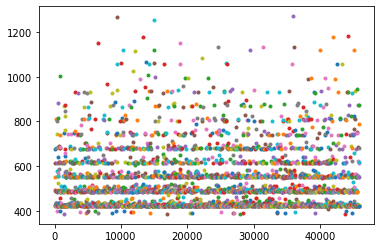

In [5]:
import matplotlib.pyplot as plt
p = 0
slected_change_region_time = []

for i in range(len(change_region_time)):
    if change_region_time[i] < 500:
        continue
        
    #if change_region_time[i]-change_region_time[i-1] > 337:
    if change_region_time[i]-change_region_time[i-1] > 385:
        slected_change_region_time.append(change_region_time[i])
        plt.plot(i, change_region_time[i]-change_region_time[i-1], linestyle = 'None', marker = '.')
        #print(change_region_time[i+1]-change_region_time[i])
        p = p + 1
print('p =', p)
    
    

In [6]:
with open("step8_Xf_history.txt", "rb") as fp:   # Unpickling
    Xf_history = pickle.load(fp)
with open("step8_Xa_history.txt", "rb") as fp:   # Unpickling
    Xa_history = pickle.load(fp)

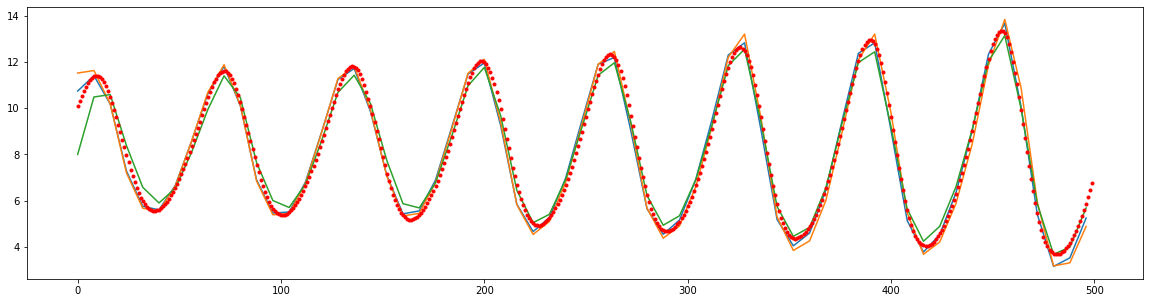

In [7]:
plt.figure(figsize = (20,5))
#plt.plot(range(0,500,acyc_step),Xf_history[0:500:acyc_step,2,:])
plt.plot(range(0,500,acyc_step),Xa_history[0:500:acyc_step,1,:])
plt.plot(range(0,500),x_nature[1,0:500], linestyle = 'None', marker = '.', color = 'r')

(array([-30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

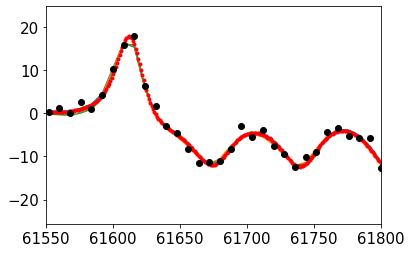

In [8]:
plt.plot(range(0,18000*8,acyc_step), Xa_history[0:18000*8:acyc_step,0,:])
plt.plot(x_nature[0,0:18000*8], linestyle = 'None', marker = '.', color = 'r')
#plt.plot(range(acyc_step,18000*8,acyc_step), Xf_history[acyc_step:18000*8:acyc_step,0,:], linestyle = 'None', marker = '*', color = 'green')
plt.plot(range(0,18000*8,acyc_step),y_obs[0,0:18000*8:acyc_step], linestyle = 'None', marker = 'o', color = 'k')
plt.rcParams['figure.figsize'] = [30/1, 10/1]
plt.xlim(61550,61800)
plt.xticks(fontsize = 15)
plt.yticks(fontsize =15)
#plt.ylim(4,12)

In [65]:
natural_variability_l63 = np.mean(np.linalg.norm(x_nature - np.matrix(np.mean(x_nature,axis = 1)).T, axis = 0))

In [9]:
# compute the number of cycles

a = 0
b = 0
for i in range(len(x_nature[0,16:-20])-1):
    
    if (x_nature[0,i+1+16]-x_nature[0,i+16])*(x_nature[0,i+2+16]-x_nature[0,i+16+1])<0 or x_nature[0,i]*x_nature[0,i+1]<0:
        b=b+1
    if b >1:
        a = a+1
        b = 0
print(a)
print('average steps in one cycle = ', len(x_nature[0,16:-23])/a)

106499
average steps in one cycle =  75.11771002544624


In [10]:
t_start_series =[]
for point in slected_change_region_time:
    if point%1 ==0:
        t_start_series.append(point)
        if len(t_start_series)>99:
            break

In [11]:
t_start_series[40:80]

[106069,
 107043,
 109371,
 111261,
 112987,
 114146,
 122065,
 124720,
 125339,
 125854,
 126902,
 128058,
 130718,
 132342,
 133311,
 138699,
 140562,
 144953,
 147614,
 149418,
 150056,
 150796,
 152308,
 155048,
 155666,
 162753,
 164411,
 168461,
 172109,
 173399,
 173894,
 175011,
 179671,
 184480,
 197270,
 199278,
 200712,
 201304,
 208511,
 209397]

In [12]:
np.ceil(75.1*np.matrix([1, 1.5, 2, 2.5, 3,4,5]))

matrix([[ 76., 113., 151., 188., 226., 301., 376.]])

un_success 0 of 0
[ 8.01616968  3.56871156 31.47173769]
105768
0


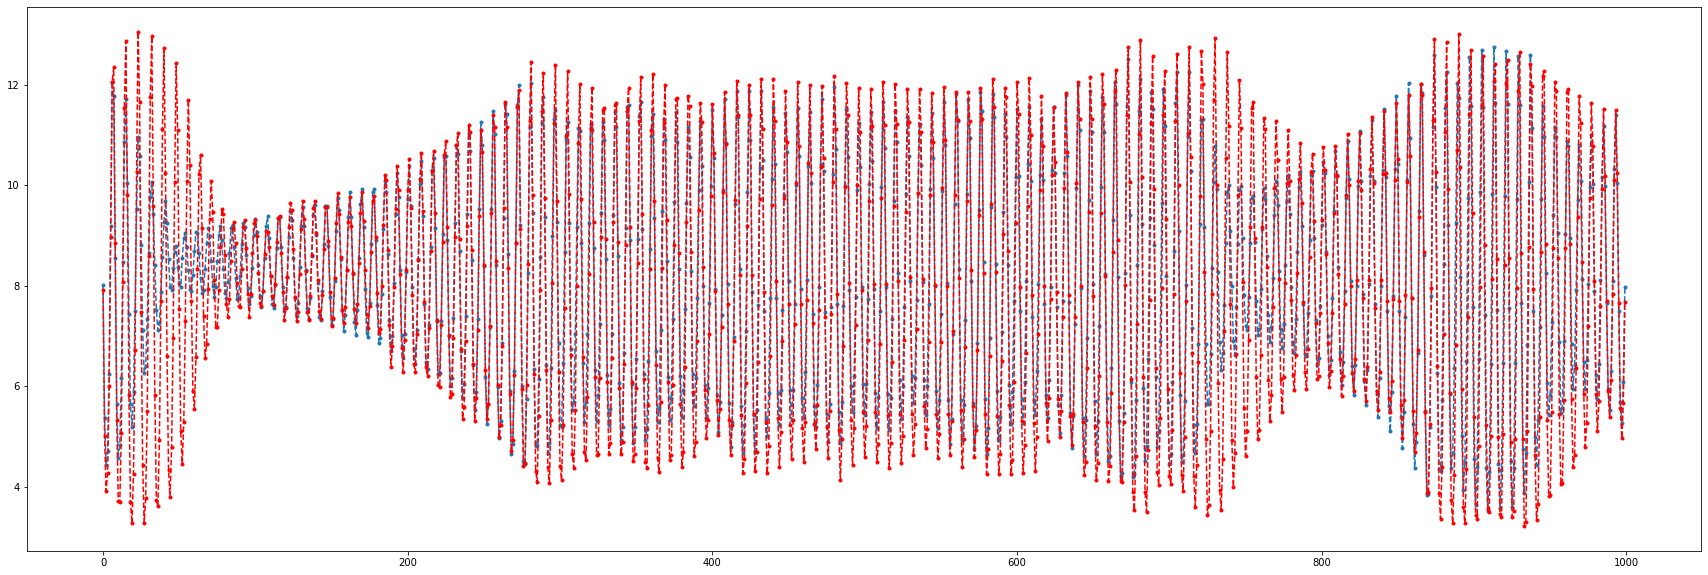

[  3   4 922 923 924 925 926 928 929 869 870 871 872 873 876 877 893 894
 895 896 897 898 899 900 901 902 903 904 905 906 907 908 909 910 911 912
 913 914 915 916 919 920 921 667 668 923 669 670 671 672 673 930 676 933
 934 935 936 701 702]


In [14]:
#designed partial perturbation 

import matplotlib.ticker as mticker
import matplotlib
import pylab as pl
control_f =[]
count = 0
ready = 0
obs_error_std = np.sqrt(2)
untouch_state=[]
observe= [0,1,2] #observe all [0,1,2] observe x,y [0,1] abserve x [0]
control_t_all = []
fa_control_t_all = []
s_control_t_all = []

fa_fcst_err_all = []
fa_fcst_sprd_all = []
fa_ana_err_all = []
s_fcst_err_all = []
s_fcst_sprd_all = []
s_ana_err_all = []
f_fcst_err_all = []
f_fcst_sprd_all = []
f_ana_err_all = []
np_fcst_err_all = []
np_fcst_sprd_all = []
np_ana_err_all = []

lalal = 0

for t_start in t_start_series[40:41]:
    print('un_success %s of %s'%(sum(control_f), count))
    cant_control = False
    smd = LORENZ63(sigma = 10.0, beta = 8.0/3.0, rho = 28.0)
    forward = 0 # predict xx more steps after time zero
    multiple_number =4 #this is the  parameter before To in the paper 
    position = int(np.ceil(75.1*multiple_number)) #multiple of To
    Xanalysis_hist = Xa_history

    #t_start = 17060

    Xa_initial = Xanalysis_hist[(t_start - position) - (t_start - position)%acyc_step, :, :] ########Changed
    Xa_initial = np.matrix(Xa_initial) # shape = xdim*(edim+1), time point = i steps before change of regime
    #print(Xa_initial)
    ###
    print(x_nature[:,(t_start - position)-(t_start - position)%acyc_step])
    print((t_start - position)-(t_start - position)%acyc_step)
    print(lalal)
    lalal = lalal +1
    #continue

    t = np.arange(0, 0.01 * position + forward * 0.01 + 0.001, 0.01)
    t_output = t 

    t_conti = np.arange(0, 0.01 * acyc_step + 0.001, 0.01)
    t_conti_output = np.arange(0.01, 0.01 * acyc_step + 0.001, 0.01)

    amp_depend = False
    #ignore begin
    per_times = 0
    per_t_cri =3
    amp_i_rate = 0.7
    #ignore end


    xf_4d_box= np.zeros((das.edim , das.xdim, position + 1 + forward)) #change the first dimension
    uch = 0
    fa = 0
    perturbed = False
    x_original = x_nature[:,(t_start - position)-(t_start - position)%acyc_step]  ####changed time
    experiment_step = 1000
    Xa_history_control = np.zeros((experiment_step+1, das.xdim, das.edim))
    Xa_history_control[0,:,:] = Xanalysis_hist[(t_start - position) - (t_start - position)%acyc_step, :, :]########changed time
    evo_history = np.zeros((3,experiment_step*acyc_step+1))
    no_ch_bkp = np.zeros((experiment_step, das.xdim, das.edim))   # change the last dimension
    evo_history[:,0]=x_original
    perturbed_time = []
    success_perturbed_time = []
    false_alarm_perturbed_time = []
    
    fcst_err_hist = np.zeros((experiment_step,position+1))
    ana_err_hist = np.zeros((experiment_step,position+1))
    fcst_sprd_hist = np.zeros((experiment_step,position+1))
    ana_sprd_hist = np.zeros((experiment_step,position+1))
    #ana_err_hist.append(np.sqrt(np.mean(np.square(np.mean(Xa_initial, axis = 1).T - x_original))))
    #fcst_err_hist.append(np.sqrt(np.mean(np.square(np.mean(Xf_history[(t_start - position) - (t_start - position)%acyc_step, :, :], axis = 1).T - x_original))))
    perturbation_all_history = np.zeros((3,experiment_step*acyc_step+1))
    
    
    for time in range(experiment_step):
        #print(time)
        if not all(item > 0 for item in evo_history[0,0:time * acyc_step]*evo_history[0,0]):
            cant_control = True
            break   
        amp=1/0.05 #control the amplitude (1/amp) of perturbation
        change_ens = []
        unchange_ens = []
        p_change = 0
        if perturbed or time ==0: 
            '''
            if perturbed and draw:
                plt.figure(figsize = (15,5))
                plt.plot(evol[0,:], color = 'k', label = 'NR before control')
            if perturbed and false_alarm:
                plt.figure(figsize = (15,5))
                plt.plot(evol[0,:], color = 'k', label = 'NR before control')
            '''
            evol = smd.run(x_original, t, t_output)
            evol = evol.y
            '''
            if perturbed and draw:
                for l in range(das.edim):
                    plt.plot(xf_4d_box[l,0,:], color = 'skyblue')
                plt.plot([],[],color = 'skyblue', label = 'ensembles')
                plt.plot(np.hstack((evo_history[0,(time-1)*acyc_step:time*acyc_step],evol[0,0:-5])), color = 'red', label = 'NR after control')
                plt.axhline(y = 0, linestyle = 'dashed', color = 'grey')
                plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
                plt.xlabel('time steps (norm of perturbations: %g)'%(1/amp), fontsize = 16)
                plt.ylabel('x state', fontsize = 16)
                plt.legend(loc = 'best', fontsize = 15)
                #plt.savefig('control_example_%s'%(time), bbox_inches='tight')
                plt.show()
            
            if perturbed and false_alarm:
                for l in range(das.edim):
                    plt.plot(xf_4d_box[l,0,:], color = 'skyblue')
                plt.plot([],[],color = 'skyblue', label = 'ensembles')
                plt.plot(np.hstack((evo_history[0,(time-1)*acyc_step:time*acyc_step],evol[0,0:-5])), color = 'red', label = 'NR after control')
                plt.axhline(y = 0, linestyle = 'dashed', color = 'grey')
                plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
                plt.xlabel('time steps (norm of perturbations: %g)'%(1/amp), fontsize = 16)
                plt.ylabel('x state', fontsize = 16)
                plt.legend(loc = 'best', fontsize = 15)
                #plt.savefig('control_example_%s'%(time), bbox_inches='tight')
                plt.show()
           '''
              
            if perturbed and not false_alarm:
                if all(item > 0 for item in evol[0,0:-acyc_step]) or all(item < 0 for item in evol[0,0:-acyc_step]):
                    success_perturbed_time = np.hstack((success_perturbed_time,np.arange((time-1)*acyc_step + 1, (time)*acyc_step)))
                
        else:
            evol_conti = smd.run(evol[:,-1], t_conti, t_conti_output)
            evol_conti = evol_conti.y
            evol = np.hstack((evol[:,acyc_step:], evol_conti))
        
        draw = False

        for k in range(das.edim): ######change range
            xf_ens = smd.run(Xa_initial[:,k].A1, t, t_output)
            xf_ens = xf_ens.y # xdim * #(t_output)
            if all(item > 0 for item in xf_ens[0,:]) or all(item < 0 for item in xf_ens[0,:]):
                unchange_ens.append(k)
                #print('No change by ens', k)
                no_ch_bkp[time, :,k]= xf_ens[:,0]
            else:
                change_ens.append(k)
                p_change = p_change + 1
                for q in range(len(xf_ens[0,:])-1):
                    if xf_ens[0,q]*xf_ens[0,q+1]<0:
                        I_know = 1
                        #print('predict change at', q+1, 'steps later by ens', k)
            xf_4d_box[k,:,:] = xf_ens
            
        if p_change < das.edim and p_change > 0: ####change p_change <
            false_alarm = False
            if perturbed:
                per_times = per_times + 1
            if per_times > per_t_cri and amp_depend:
                amp = amp * amp_i_rate 
            perturbed = True
            perturbed_time = np.hstack((perturbed_time,np.arange(time*acyc_step + 1, (time+1)*acyc_step)))

            if all(item > 0 for item in evol[0,:]) or all(item < 0 for item in evol[0,:]):
                #print('False alarm')
                false_alarm = True
                false_alarm_perturbed_time = np.hstack((false_alarm_perturbed_time,np.arange(time*acyc_step + 1, (time+1)*acyc_step)))
            
            else:
                draw = True

            perturbation_all = xf_4d_box[np.random.choice(unchange_ens),:,1:acyc_step]-xf_4d_box[np.random.choice(change_ens),:,1:acyc_step]
            perturbation_all[untouch_state,:]=0
            perturbation_all_history[:,time*acyc_step+1:time*acyc_step+acyc_step]=perturbation_all
            perturbation_vector = perturbation_all/(amp*np.linalg.norm(perturbation_all,axis = 0))
            x_original_gen = smd.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
            x_original_gen = x_original_gen.y
            x_original = x_original_gen[:,1]
            #print(perturbation_vector)
            for q in range(acyc_step-1):
                x_perturbed_ini = x_original + perturbation_vector[:,q]
                evo_history[:,time * acyc_step + q + 1] = x_perturbed_ini
                perturbed_nature_evo = smd.run(x_perturbed_ini, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                perturbed_nature_evo = perturbed_nature_evo.y
                x_original = perturbed_nature_evo[:,1]
            evo_history[:, time * acyc_step + acyc_step] = x_original
            #-------Qiwen 2021-04-01 for compute theforecase error&sprd--------#
            fcst_err = np.sqrt(np.mean(np.square(np.mean(xf_4d_box[0:das.edim,:,:], axis = 0) - evol), axis=0))
            fcst_sprd = np.mean(np.std(xf_4d_box[0:das.edim,:,:], axis = 0), axis = 0)
            fcst_sprd_hist[time] = fcst_sprd
            fcst_err_hist[time]=fcst_err


            obs = x_original + np.random.normal(0,obs_error_std,das.xdim)
            obs = obs[observe]
            Xa, KH = das.compute_analysis(xf_4d_box[0:das.edim,:,acyc_step].T,obs)
            #-------Qiwen 2021-03-12 for compute the analysis error--------#
            #ana_err = np.sqrt(np.mean(np.square(np.mean(Xa, axis = 1).T - x_original)))
            #ana_err_hist.append(ana_err)
            
            Xa_history_control[time+1,:,:] = Xa

            Xa_initial = Xa ##only ensembles
            Xa_initial = np.matrix(Xa_initial) 
        elif p_change < 1:
            per_times = 0
            perturbed = False
            #print('Predict: SAFE')
            if all(item > 0 for item in evol[0,:]) or all(item < 0 for item in evol[0,:]):
                #print('Truth(hide): SAFE')
                I_know = 1
            else:
                uch = uch + 1
                #print('-------------Undetect Change----------------------------')

            evo_history[:, time * acyc_step + 1 : time * acyc_step + acyc_step + 1] = evol[:,1:acyc_step+1]
            x_original = evol[:,acyc_step]
            
            #-------Qiwen 2021-04-01 for compute theforecase error--------#
            fcst_err = np.sqrt(np.mean(np.square(np.mean(xf_4d_box[0:das.edim,:,:], axis = 0) - evol), axis=0))
            fcst_sprd = np.mean(np.std(xf_4d_box[0:das.edim,:,:], axis = 0), axis = 0)
            fcst_sprd_hist[time] = fcst_sprd
            fcst_err_hist[time]=fcst_err
            
            obs = x_original + np.random.normal(0,obs_error_std,das.xdim)
            obs = obs[observe]
            Xa, KH = das.compute_analysis(xf_4d_box[0:das.edim,:,acyc_step].T,obs)
            #-------Qiwen 2021-03-12 for compute the analysis error--------#
            #ana_err = np.sqrt(np.mean(np.square(np.mean(Xa, axis = 1).T - x_original)))
            #ana_err_hist.append(ana_err)
            
            Xa_history_control[time+1,:,:] = Xa

            Xa_initial = Xa ##### change
            Xa_initial = np.matrix(Xa_initial)       


        else: #no ensemble member predicts unchange
            false_alarm = False
            if perturbed:
                per_times = per_times + 1
            if per_times > per_t_cri and amp_depend:
                amp = amp * amp_i_rate

            perturbed = True
            perturbed_time = np.hstack((perturbed_time,np.arange(time*acyc_step + 1, (time+1)*acyc_step)))
            if all(item > 0 for item in evol[0,:]) or all(item < 0 for item in evol[0,:]):
                #print('False alarm')
                false_alarm = True
                false_alarm_perturbed_time = np.hstack((false_alarm_perturbed_time,np.arange(time*acyc_step + 1, (time+1)*acyc_step)))
            
            else:
                I_know = 1
                #print('-------------Truth(hide):Change---------------------------')

            if time == 0:
                find = False
                for l in range(1, ((t_start - position)-(t_start - position)%acyc_step)//acyc_step, 1): #bug
                    Xa_before = Xanalysis_hist[(t_start - position)-(t_start - position)%acyc_step - l*acyc_step, :, :]
                    Xa_before = np.matrix(Xa_before) #bug
                    t_b = np.arange(0, 0.01 * (position + (t_start - position)%acyc_step + forward + l*acyc_step) + 0.001, 0.01)
                    t_b_output = t_b[l*acyc_step+1:]
                    for v in range(das.edim):
                        xf_ens = smd.run(Xa_before[:,v].A1, t_b, t_b_output)
                        xf_ens = xf_ens.y # xdim * #(t_output)

                        if all(item > 0 for item in xf_ens[0,:] * xf_4d_box[0,0,0]):
                            find = True
                            perturbation_all = xf_ens[:,0:acyc_step-1] - xf_4d_box[np.random.choice(change_ens),:,1:acyc_step]
                            perturbation_all[untouch_state,:]=0
                            perturbation_all_history[:,time*acyc_step+1:time*acyc_step+acyc_step]=perturbation_all
                            perturbation_vector = perturbation_all/(amp*np.linalg.norm(perturbation_all,axis = 0))
                            
                            x_original_gen = smd.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                            x_original_gen = x_original_gen.y
                            x_original = x_original_gen[:,1]
                            for q in range(acyc_step-1):
                                x_perturbed_ini = x_original + perturbation_vector[:,q]
                                evo_history[:, time * acyc_step + q + 1] = x_perturbed_ini
                                perturbed_nature_evo = smd.run(x_perturbed_ini, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                                perturbed_nature_evo = perturbed_nature_evo.y
                                x_original = perturbed_nature_evo[:,1]
                            evo_history[:, time * acyc_step + acyc_step] = x_original
                            
                            #-------Qiwen 2021-04-01 for compute theforecase error sprd--------#
                            fcst_err = np.sqrt(np.mean(np.square(np.mean(xf_4d_box[0:das.edim,:,:], axis = 0) - evol), axis=0))
                            fcst_sprd = np.mean(np.std(xf_4d_box[0:das.edim,:,:], axis = 0), axis = 0)
                            fcst_sprd_hist[time] = fcst_sprd
                            fcst_err_hist[time]=fcst_err

                            obs = x_original + np.random.normal(0,obs_error_std,das.xdim)
                            obs = obs[observe]
                            Xa, KH = das.compute_analysis(xf_4d_box[0:das.edim,:,acyc_step].T,obs)
                            #-------Qiwen 2021-03-12 for compute the analysis error--------#
                            #ana_err = np.sqrt(np.mean(np.square(np.mean(Xa, axis = 1).T - x_original)))
                            #ana_err_hist.append(ana_err)
                            
                            Xa_history_control[time+1,:,:] = Xa

                            Xa_initial = Xa    #####changed
                            Xa_initial = np.matrix(Xa_initial)
                            break   
                    if find:
                        break
                    if not find and l == ((t_start - position)-(t_start - position)%acyc_step)//acyc_step -1:   ####change
                        sys.exit("Can't find any good perturbation")
            else:
                #print('Go to find previous unchange ensemble member')                              
                for s in range(1,time + ((t_start - position)-(t_start - position)%acyc_step)//acyc_step,1): ###change
                    #print('s=',s)
                    if s > time:
                        find = False
                        #for l in range(1, ((t_start - position)-(t_start - position)%acyc_step)//acyc_step, 1):#change
                        Xa_before = Xanalysis_hist[(t_start - position)-(t_start - position)%acyc_step - (s-time)*acyc_step, :, :] #change
                        Xa_before = np.matrix(Xa_before)  #bug
                        t_b = np.arange(0, 0.01 * (position + forward + s*acyc_step) + 0.001, 0.01)
                        t_b_output = t_b[s * acyc_step + 1:]
                        for v in range(das.edim):  #change range
                            xf_ens = smd.run(Xa_before[:,v].A1, t_b, t_b_output)
                            xf_ens = xf_ens.y # xdim * #(t_output)

                            if all(item > 0 for item in xf_ens[0,:] * xf_4d_box[0,0,0]):
                                find = True
                                perturbation_all = xf_ens[:,0:acyc_step-1] - xf_4d_box[np.random.choice(change_ens),:,1:acyc_step]
                                perturbation_all[untouch_state,:]=0
                                perturbation_all_history[:,time*acyc_step+1:time*acyc_step+acyc_step]=perturbation_all
                                perturbation_vector = perturbation_all/(amp*np.linalg.norm(perturbation_all,axis = 0))

                                x_original_gen = smd.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                                x_original_gen = x_original_gen.y
                                x_original = x_original_gen[:,1]
                                for q in range(acyc_step-1):
                                    x_perturbed_ini = x_original + perturbation_vector[:,q]
                                    evo_history[:, time * acyc_step + q + 1] = x_perturbed_ini
                                    perturbed_nature_evo = smd.run(x_perturbed_ini, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                                    perturbed_nature_evo = perturbed_nature_evo.y
                                    x_original = perturbed_nature_evo[:,1]
                                evo_history[:, time * acyc_step + acyc_step] = x_original

                                #-------Qiwen 2021-04-01 for compute theforecase error--------#
                                fcst_err = np.sqrt(np.mean(np.square(np.mean(xf_4d_box[0:das.edim,:,:], axis = 0) - evol), axis=0))
                                fcst_sprd = np.mean(np.std(xf_4d_box[0:das.edim,:,:], axis = 0), axis = 0)
                                fcst_sprd_hist[time] = fcst_sprd
                                fcst_err_hist[time]=fcst_err

                                obs = x_original + np.random.normal(0,obs_error_std,das.xdim)
                                obs = obs[observe]
                                Xa, KH = das.compute_analysis(xf_4d_box[0:das.edim,:,acyc_step].T,obs)

                                #-------Qiwen 2021-03-12 for compute the analysis error--------#
                                #ana_err = np.sqrt(np.mean(np.square(np.mean(Xa, axis = 1).T - x_original)))
                                #ana_err_hist.append(ana_err)
                                    
                                Xa_history_control[time+1,:,:] = Xa

                                Xa_initial = Xa ###change
                                Xa_initial = np.matrix(Xa_initial)
                                break   
                        if find:
                            break
                        elif not find and s== time + ((t_start - position)-(t_start - position)%acyc_step)//acyc_step -1: ###change
                            sys.exit("Can't find any good perturbation")


                    else:                        
                        ##2021-05-09 can use Xa_history_control 
                        unchange_bkp=[]
                        for w in range(das.edim):
                            if no_ch_bkp[time-s,2, w] != 0:
                                unchange_bkp.append(w)
                        if len(unchange_bkp)==0:
                            continue
                        #######

                        else:
                            find = False
                            for w in unchange_bkp:
                                t_help = np.arange(0, 0.01*(s*acyc_step + position + forward)+ 0.00001, 0.01)
                                t_help_output = t_help[s*acyc_step +1:]
                                uc_help = smd.run(no_ch_bkp[time-s,:, w], t_help, t_help_output)
                                uc_help = uc_help.y
                                if all(item > 0 for item in uc_help[0,:]* xf_4d_box[0,0,0]):
                                    find = True

                                    perturbation_all = uc_help[:,0:acyc_step-1] - xf_4d_box[np.random.choice(change_ens),:,1:acyc_step]
                                    perturbation_all[untouch_state,:]=0
                                    perturbation_all_history[:,time*acyc_step+1:time*acyc_step+acyc_step]=perturbation_all
                                    perturbation_vector = perturbation_all/(amp*np.linalg.norm(perturbation_all,axis = 0))
                                    
                                    x_original_gen = smd.run(x_original, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                                    x_original_gen = x_original_gen.y
                                    x_original = x_original_gen[:,1]
                                    
                                    for q in range(acyc_step-1):
                                        x_perturbed_ini = x_original + perturbation_vector[:,q]
                                        evo_history[:, time * acyc_step + q + 1] = x_perturbed_ini
                                        perturbed_nature_evo = smd.run(x_perturbed_ini, np.arange(0, 0.015, 0.01), np.arange(0, 0.015, 0.01))
                                        perturbed_nature_evo = perturbed_nature_evo.y
                                        x_original = perturbed_nature_evo[:,1]
                                    evo_history[:, time * acyc_step + acyc_step] = x_original
                                    
                                    #-------Qiwen 2021-04-01 for compute theforecase error--------#
                                    fcst_err = np.sqrt(np.mean(np.square(np.mean(xf_4d_box[0:das.edim,:,:], axis = 0) - evol), axis=0))
                                    fcst_sprd = np.mean(np.std(xf_4d_box[0:das.edim,:,:], axis = 0), axis = 0)
                                    fcst_sprd_hist[time] = fcst_sprd
                                    fcst_err_hist[time]=fcst_err

                                    obs = x_original + np.random.normal(0,obs_error_std,das.xdim)
                                    obs = obs[observe]
                                    Xa, KH = das.compute_analysis(xf_4d_box[0:das.edim,:,acyc_step].T,obs)
                                    
                                    #-------Qiwen 2021-03-12 for compute the analysis error--------#
                                    #ana_err = np.sqrt(np.mean(np.square(np.mean(Xa, axis = 1).T - x_original)))
                                    #ana_err_hist.append(ana_err)
                                    
                                    Xa_history_control[time+1,:,:] = Xa

                                    Xa_initial = Xa ####change
                                    Xa_initial = np.matrix(Xa_initial)
                                    break
                            if find:
                                break
    plt.plot(evo_history[0, 0:(time+1)*acyc_step:acyc_step], linestyle = 'dashed',marker='.')
    plt.plot(np.mean(Xa_history_control[0:time+1,0,: ],axis = 1), linestyle = 'dashed',marker='.',color = 'r')
    plt.show()
    with open("evo_history_mul_%s_norm_%s_trial_%s.txt"%(multiple_number,1/amp, count), "wb") as fp:
            pickle.dump(evo_history, fp)
    with open("perturbed_time_mul_%s_norm_%s_trial_%s.txt"%(multiple_number,1/amp, count), "wb") as fp:
            pickle.dump(perturbed_time, fp)
    count = count + 1
    
    if cant_control:
        control_f.append(1)
        continue
    control_t_all.append((len(perturbed_time)/(acyc_step-1)))
    fa_control_t_all.append(len(false_alarm_perturbed_time)/(acyc_step-1))
    s_control_t_all.append(len(success_perturbed_time)/(acyc_step-1))
    
    #fcst_err_hist= np.array(fcst_err_hist).reshape(len(fcst_err_hist))
    #ana_err_hist = np.array(ana_err_hist).reshape(len(ana_err_hist))
    if len(false_alarm_perturbed_time[0::acyc_step-1]) == 0:
        fa = []
    else:
        fa = ((false_alarm_perturbed_time[0::acyc_step-1]-1)//acyc_step).astype(int)
    
    #fa_fcst_err_all = np.hstack((fa_fcst_err_all,fcst_err_hist[fa]))
    if len(success_perturbed_time[0::acyc_step-1]) == 0:
        ss = []
    else:
        ss = ((success_perturbed_time[0::acyc_step-1]-1)//acyc_step).astype(int)
    
    #s_fcst_err_all = np.hstack((s_fcst_err_all,fcst_err_hist[ss]))
   
    ff = (((np.array(list(set(perturbed_time) - set(false_alarm_perturbed_time) -set(success_perturbed_time)))[0::acyc_step-1])-1)//acyc_step).astype(int)
    print(ff)
    #f_fcst_err_all = np.hstack((f_fcst_err_all,fcst_err_hist[ff]))
    
    nop = (np.array(list(set(np.arange(0,experiment_step)) - set(fa) - set(ss) -set(ff)))).astype(int)
    
    #np_fcst_err_all = np.hstack((np_fcst_err_all,fcst_err_hist[nop]))
    if count > 1 and ready == 1:
        fa_fcst_err_all = np.vstack((fa_fcst_err_all,fcst_err_hist[fa]))
        s_fcst_err_all = np.vstack((s_fcst_err_all,fcst_err_hist[ss]))
        f_fcst_err_all = np.vstack((f_fcst_err_all,fcst_err_hist[ff]))
        np_fcst_err_all = np.vstack((np_fcst_err_all,fcst_err_hist[nop]))
        fa_fcst_sprd_all = np.vstack((fa_fcst_sprd_all,fcst_sprd_hist[fa]))
        s_fcst_sprd_all = np.vstack((s_fcst_sprd_all,fcst_sprd_hist[ss]))
        f_fcst_sprd_all = np.vstack((f_fcst_sprd_all,fcst_sprd_hist[ff]))
        np_fcst_sprd_all = np.vstack((np_fcst_sprd_all,fcst_sprd_hist[nop]))
    else:
        ready = 1
        fa_fcst_err_all = fcst_err_hist[fa]
        s_fcst_err_all = fcst_err_hist[ss]
        f_fcst_err_all = fcst_err_hist[ff]
        np_fcst_err_all = fcst_err_hist[nop]
        fa_fcst_sprd_all = fcst_sprd_hist[fa]
        s_fcst_sprd_all = fcst_sprd_hist[ss]
        f_fcst_sprd_all = fcst_sprd_hist[ff]
        np_fcst_sprd_all = fcst_sprd_hist[nop]
   
    '''
    plt.figure(figsize = (25,6))
    plt.plot(evo_history[0, 0:5000], linestyle = 'dashed',marker='.')
    plt.axhline(y=0, linestyle='dashed', color = 'grey')
    plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
    plt.ylabel('state x', fontsize = 16)
    plt.title('Lorenz-63 state x under control', fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylim(-18,18)
    plt.text(0,-5, 'DA %s'%(acyc_step),fontsize = 15)
    plt.text(0,-10, 'forcast %s steps'%(position),fontsize = 15)
    plt.text(0,-15, 'amplitude of perturbation %g'%(1/amp),fontsize = 15)
    #plt.text(1500,-5, 'false alarm %s / %s'%(fa, experiment_step),fontsize = 15)
    #plt.text(1500,-10, 'undetect change %s / %s'%(uch, experiment_step),fontsize = 15)
    #plt.savefig('da_%s_steps_%s_amp_%s'%(acyc_step, position,amp),bbox_inches = 'tight')
90    plt.show()
    '''




    

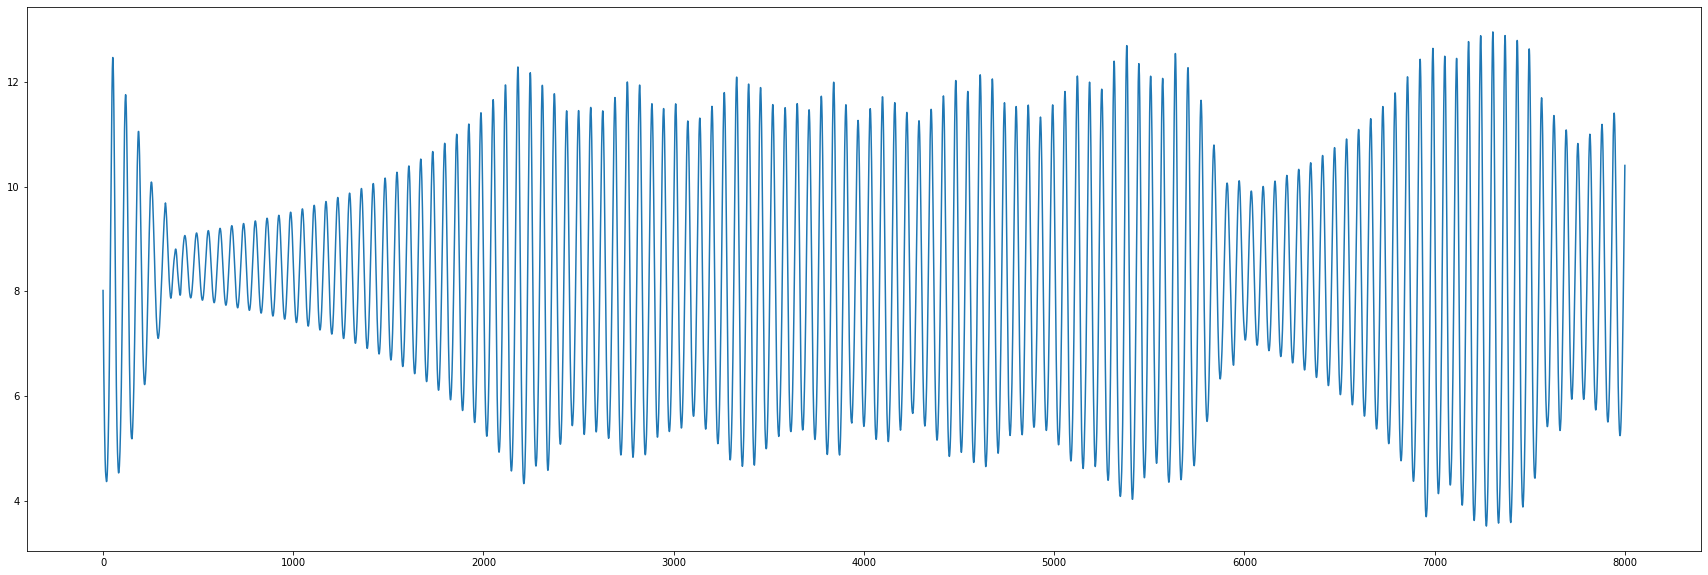

In [23]:
evo_history_all = np.zeros((40,len(evo_history), len(evo_history[0,:])))
kk = 0
for i in range(1):
    with open('evo_history_mul_%s_norm_%s_trial_%s.txt'%(multiple_number,1/amp,i), "rb") as fp:   # Unpickling
        evo_history_all[kk,:,:] = pickle.load(fp)
    kk = kk +1
    
plt.plot(evo_history_all[0,0,:])
    

In [25]:
print('un_success %s of %s'%(sum(control_f), count))

un_success 14 of 40


In [ ]:
with open("evo_history_movie.txt", "wb") as fp:
            pickle.dump(evo_history, fp)
with open("perturbed_time_movie.txt", "wb") as fp:
            pickle.dump(perturbed_time, fp)
with open("success_perturbed_time_movie.txt", "wb") as fp:
            pickle.dump(success_perturbed_time, fp)
with open("false_alarm_perturbed_time_movie.txt", "wb") as fp:
            pickle.dump(false_alarm_perturbed_time, fp)


In [34]:
print('untouch_state =', untouch_state)
print('Multiple=',multiple_number)
print('norm=',1/amp)
print('success ratio', round((40 - sum(control_f))/40,2))
print('control ratio =',round(sum(control_t_all)/experiment_step/len(control_t_all),3))
print('success control ratio = ',round(sum(s_control_t_all)/experiment_step/len(control_t_all),3))
print('false alarm ratio =', round(sum(fa_control_t_all)/experiment_step/len(control_t_all),3))


untouch_state = []
Multiple= 4
norm= 0.03
success ratio 1.0
control ratio = 0.718
success control ratio =  0.027
false alarm ratio = 0.594


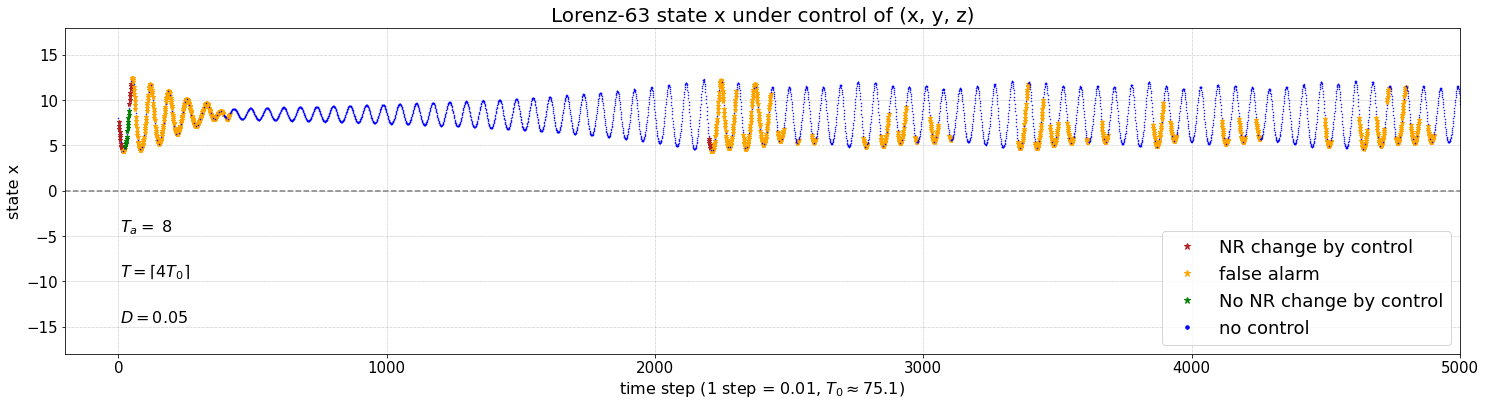

In [22]:
plt.figure(figsize = (25,6))
ticks = np.arange(0, experiment_step*acyc_step)

for i in success_perturbed_time:
    plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='firebrick')
for i in false_alarm_perturbed_time:   
    plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='orange')
for i in perturbed_time:
    if i not in success_perturbed_time:
        if i not in false_alarm_perturbed_time:
            plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='green')
for i in ticks:
    if i not in perturbed_time:
        plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='.', markersize = 1,color  ='blue')
            
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
plt.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01, $T_{0} \\approx 75.1 $)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x under control of (x, y, z)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(-18,18)
plt.xlim(-200,5000)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.text(5,-4.5, '$T_{a} = $ %s'%(acyc_step),fontsize = 16)
plt.text(5,-9.5, '$T = \lceil  %s T_{0} \\rceil$'%(multiple_number),fontsize = 16)
plt.text(5,-14.5, '$D = %g$'%(1/amp),fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 18)
#plt.savefig('da_%s_steps_%s_amp_%s_x_y_z'%(acyc_step, position, 20_100),bbox_inches = 'tight')
plt.show()


In [47]:
evo_history_a = np.copy(evo_history)
perturbed_time_a = np.copy(perturbed_time)
success_perturbed_time_a = np.copy(success_perturbed_time)
false_alarm_perturbed_time_a = np.copy(false_alarm_perturbed_time)

No handles with labels found to put in legend.


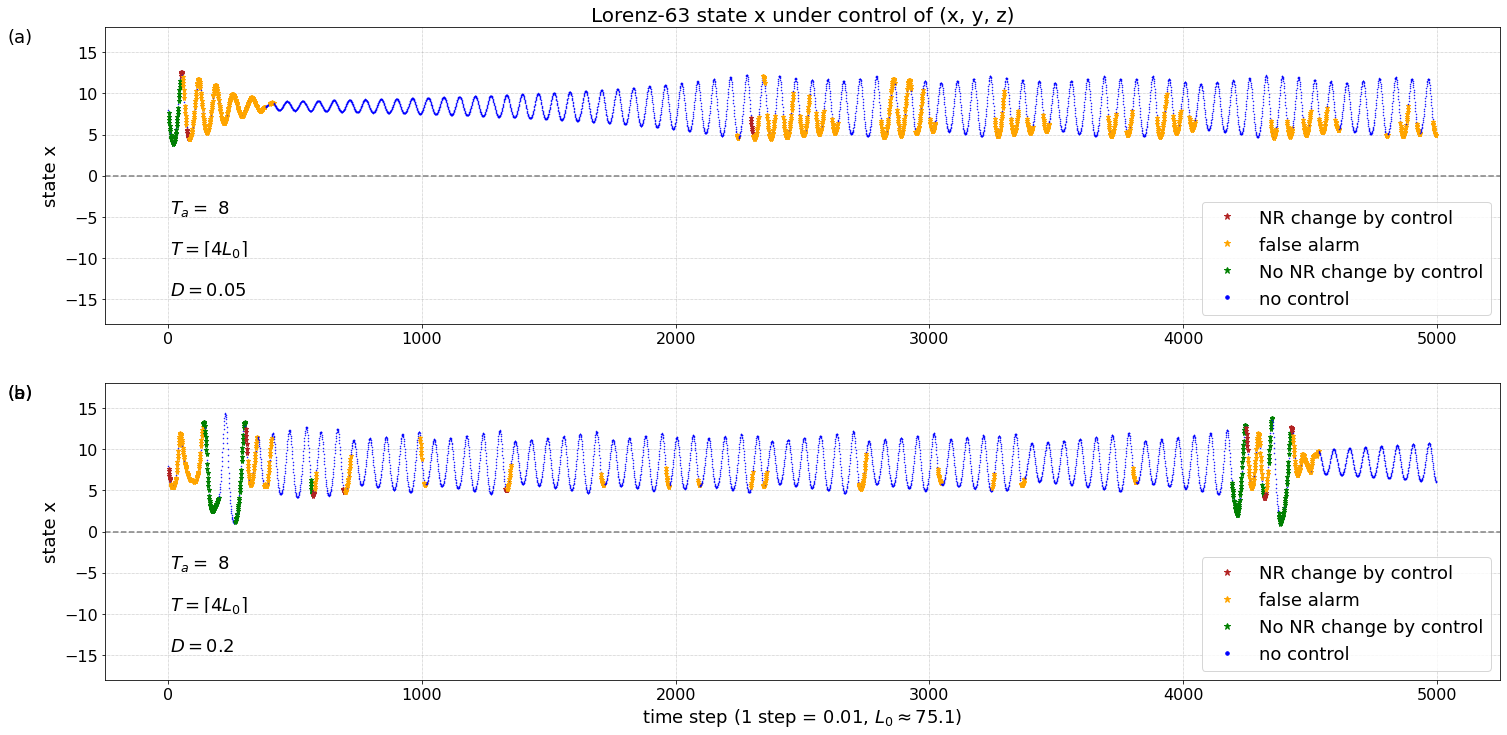

In [52]:
fig = plt.figure(figsize = (25,12))

ax = fig.add_subplot(2, 1, 1)

ticks = np.arange(0, experiment_step*acyc_step)

for i in ticks[0:5000]:
    if i not in perturbed_time_a:
        ax.plot(int(i+0.000001), evo_history_a[0, int(i+0.0000001)], linestyle = 'None',marker='.', markersize = 1,color  ='blue')
    else:
        if i in success_perturbed_time_a:
            ax.plot(int(i+0.000001), evo_history_a[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='firebrick')
    
        elif i in false_alarm_perturbed_time_a:   
            ax.plot(int(i+0.000001), evo_history_a[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='orange')
        else:
            ax.plot(int(i+0.000001), evo_history_a[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='green')
        
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
ax.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
ax.axhline(y=0, linestyle='dashed', color = 'grey')

ax.set_ylabel('state x', fontsize = 18)
ax.set_title('Lorenz-63 state x under control of (x, y, z)', fontsize = 20)

ax.tick_params('both',labelsize = 16)
ax.set_ylim(-18,18)

ax.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
ax.text(5,-4.5, '$T_{a} = $ %s'%(acyc_step),fontsize = 18)
ax.text(5,-9.5, '$T = \lceil  %s T_{0} \\rceil$'%(multiple_number),fontsize = 18)
ax.text(5,-14.5, '$D = %g$'%(1/20),fontsize = 18)
ax.legend(loc = 'lower right', fontsize = 18)
ax.text(-0.07, 0.95, "(a)", fontsize = 18, transform=ax.transAxes)

ax = fig.add_subplot(2, 1, 2)
ax.text(-0.07, 0.95, "(b)", fontsize = 18, transform=ax.transAxes)
ax.set_xlabel('time step (1 step = 0.01, $T_{0} \\approx 75.1 $)', fontsize = 18)
ax.legend(loc = 'best', fontsize = 18)
for i in ticks[0:5000]:
    if i not in perturbed_time:
        ax.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='.', markersize = 1,color  ='blue')
    else:
        if i in success_perturbed_time:
            ax.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='firebrick')
    
        elif i in false_alarm_perturbed_time:   
            ax.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='orange')
        else:
            ax.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='green')
        
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
ax.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
ax.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
ax.axhline(y=0, linestyle='dashed', color = 'grey')

ax.set_ylabel('state x', fontsize = 18)

ax.tick_params('both',labelsize = 16)
ax.set_ylim(-18,18)

ax.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
ax.text(5,-4.5, '$T_{a} = $ %s'%(acyc_step),fontsize = 18)
ax.text(5,-9.5, '$T = \lceil  %s T_{0} \\rceil$'%(multiple_number),fontsize = 18)
ax.text(5,-14.5, '$D = %g$'%(1/amp),fontsize = 18)
ax.legend(loc = 'lower right', fontsize = 18)

#fig.suptitle('Figure 3', y =0.05, fontsize = 20)
plt.savefig('da_%s_steps_%s_amp_%s_x_y_z'%(acyc_step, position, 5_20_100),bbox_inches = 'tight')

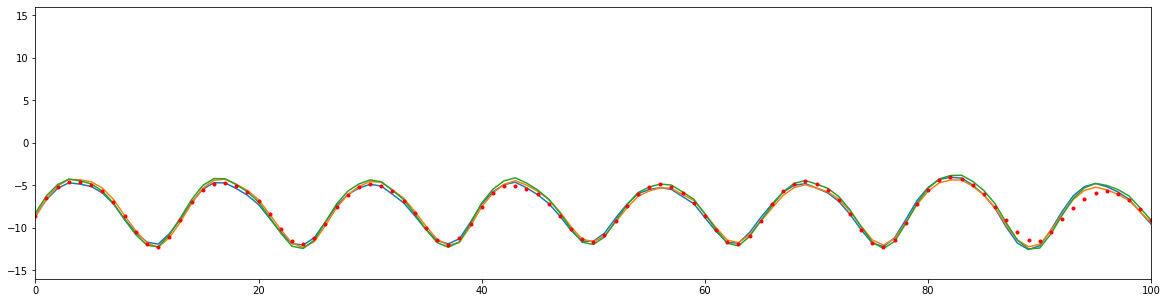

In [166]:

plt.figure(figsize = (20,5))
plt.xlim(0,100)
plt.ylim(-16,16)
plt.plot(range(0,1000,1),Xa_history_control[0:1000,0,:])
plt.plot(range(0,1000,1), evo_history[0,0:experiment_step*acyc_step:acyc_step], linestyle = 'None', marker = '.', color = 'r')

Text(0.5, 0.92, 'Lorenz-63 model under control of (y, z)')

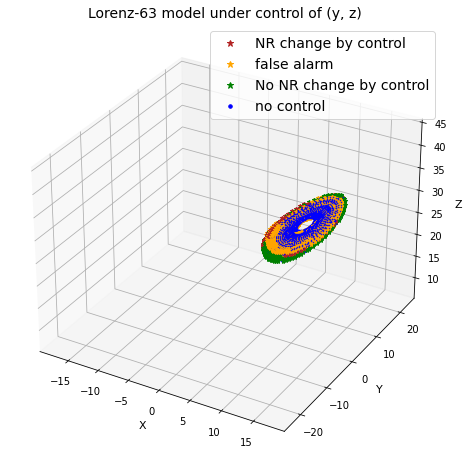

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection="3d")
ticks = np.arange(0, experiment_step*acyc_step)
for i in ticks:
    if i not in perturbed_time:
        ax.plot(evo_history[0, i], evo_history[1, i],evo_history[2, i], linestyle = 'None', marker = '.', markersize = 1, color = 'blue')
    else:
        if i in success_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'firebrick')
        elif i in false_alarm_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'orange')
        else:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'green')    
ax.set_xlabel('X', fontsize =11)
ax.set_ylabel('Y', fontsize =11)
ax.set_zlabel('Z', fontsize =11)
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
ax.plot([],[],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
ax.set_zlim(6,45)
ax.set_xlim(-19,19)
ax.set_ylim(-25,25)
plt.legend(loc = 'best', fontsize = 14)
plt.title('Lorenz-63 model under control of (y, z)',fontsize = 14)
#plt.savefig('Lorenz63_under_control_da_%s_steps_%s_amp_%s_y_z'%(acyc_step, position,5_100), bbox_inches = 'tight')

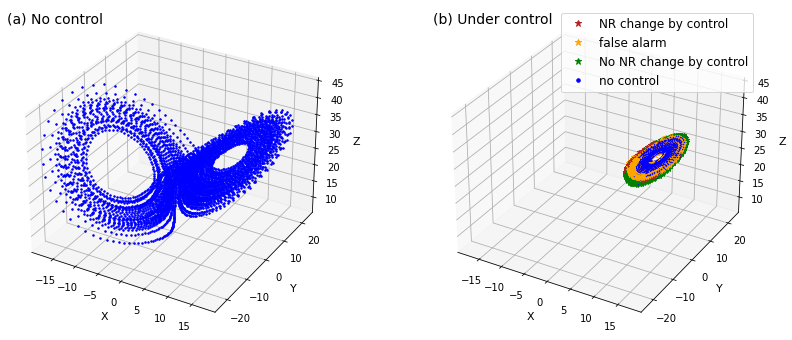

In [21]:
fig = plt.figure(figsize = (14,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot(no_control[0, 0:5000], no_control[1, 0:5000], no_control[2, 0:5000], linestyle = 'None', marker ='.', markersize =3, color = 'blue')
ax.set_xlabel('X', fontsize =11)
ax.set_ylabel('Y', fontsize =11)
ax.set_zlabel('Z', fontsize =11)
ax.set_zlim(6,45)
ax.set_xlim(-19,19)
ax.set_ylim(-25,25)
#plt.title('Lorenz-63 model natural run',fontsize = 14)
ax.text2D(0, 0.95, "(a) No control", fontsize = 14, transform=ax.transAxes)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ticks = np.arange(0, experiment_step*acyc_step)
for i in ticks:
    if i not in perturbed_time:
        ax.plot(evo_history[0, i], evo_history[1, i],evo_history[2, i], linestyle = 'None', marker = '.', markersize = 1, color = 'blue')
    else:
        if i in success_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'firebrick')
        elif i in false_alarm_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'orange')
        else:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'green')    
ax.set_xlabel('X', fontsize =11)
ax.set_ylabel('Y', fontsize =11)
ax.set_zlabel('Z', fontsize =11)
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
ax.plot([],[],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
ax.set_zlim(6,45)
ax.set_xlim(-19,19)
ax.set_ylim(-25,25)
ax.text2D(0, 0.95, "(b) Under control", fontsize = 14, transform=ax.transAxes)
plt.legend(loc = 'best', fontsize = 12)
#fig.suptitle('Figure 1', y =0.05, fontsize = 15)
#plt.savefig('Lorenz63_with_without_control_8_D_5', bbox_inches = 'tight')

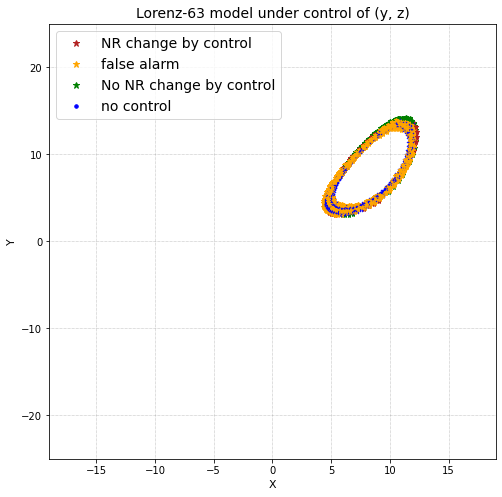

In [70]:
fig = plt.figure(figsize = (8,8))
ticks = np.arange(0, experiment_step*acyc_step)

for i in ticks: 
    if i not in perturbed_time:
        plt.plot(evo_history[0, i], evo_history[1, i], linestyle = 'None', marker = '.', markersize = 1, color = 'blue')
    else:
        if i in success_perturbed_time:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'firebrick')
        elif i in false_alarm_perturbed_time:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'orange')
        else:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'green')    

plt.xlabel('X', fontsize =11)
plt.ylabel('Y', fontsize =11)
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
plt.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
plt.xlim(-19,19)
plt.ylim(-25,25)
plt.legend(loc = 'best', fontsize = 14)
plt.title('Lorenz-63 model under control of (y, z)',fontsize = 14)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.savefig('Lorenz63_under_control_2d_da_%s_steps_%s_amp_%s_y_z'%(acyc_step, position, 5_100), bbox_inches = 'tight')
plt.show()

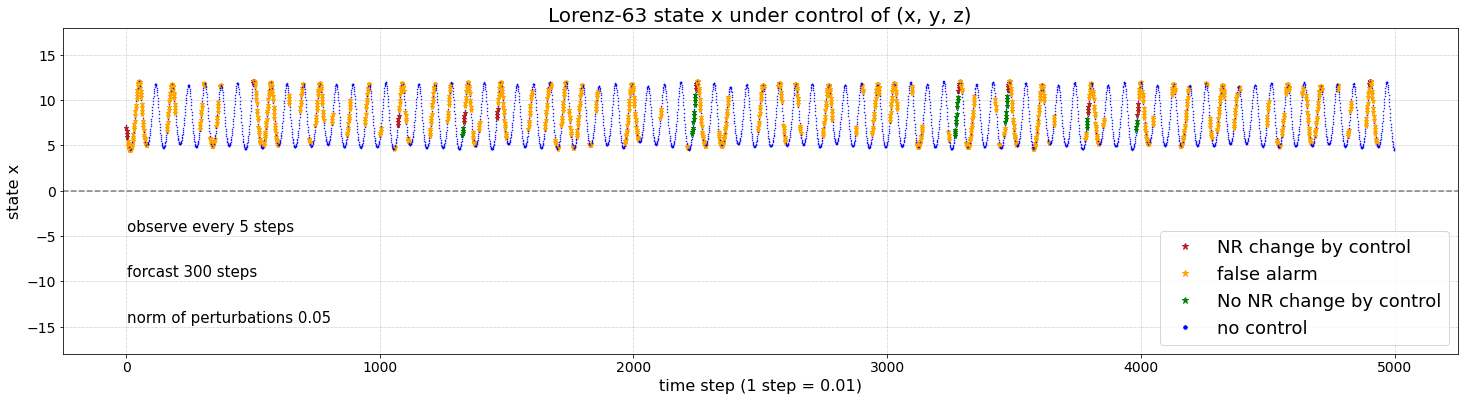

In [80]:
plt.figure(figsize = (25,6))
ticks = np.arange(0, experiment_step*acyc_step)
#ticks = np.arange(0, 100)
#success_perturbed_time1 = int(success_perturbed_time)
for i in success_perturbed_time:
    plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='firebrick')
for i in false_alarm_perturbed_time:   
    plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='orange')
for i in perturbed_time:
    if i not in success_perturbed_time:
        if i not in false_alarm_perturbed_time:
            plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='*', markersize = 5,color  ='green')
for i in ticks:
    if i not in perturbed_time:
        plt.plot(int(i+0.000001), evo_history[0, int(i+0.0000001)], linestyle = 'None',marker='.', markersize = 1,color  ='blue')
        
    #plt.plot(i, evo_history[0, i], linestyle = 'None',marker='x', markersize = 3,color  ='red' if i in success_perturbed_time else 'blue')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
plt.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x under control of (x, y, z)', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
#plt.xlim(1100,1300)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.text(5,-4.5, 'observe every %s steps'%(acyc_step),fontsize = 15)
plt.text(5,-9.5, 'forcast %s steps'%(position),fontsize = 15)
plt.text(5,-14.5, 'norm of perturbations %g'%(1/amp),fontsize = 15)
plt.legend(loc = 'lower right', fontsize = 18)
#plt.text(1500,-5, 'false alarm %s / %s'%(fa, experiment_step),fontsize = 15)
#plt.text(1500,-10, 'undetect change %s / %s'%(uch, experiment_step),fontsize = 15)
plt.savefig('da_%s_steps_%s_amp_%s_x_y_z'%(acyc_step, position, 5_100),bbox_inches = 'tight')
plt.show()


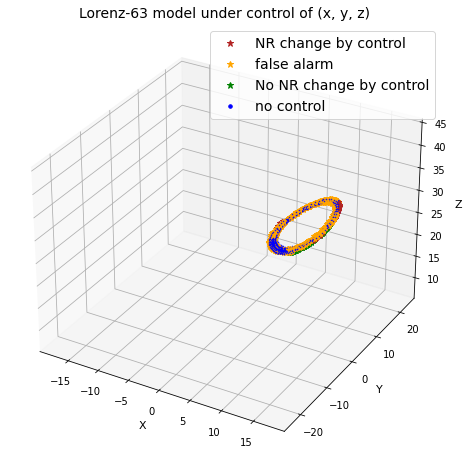

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection="3d")
ticks = np.arange(0, experiment_step*acyc_step)
for i in ticks:
    if i not in perturbed_time:
        ax.plot(evo_history[0, i], evo_history[1, i],evo_history[2, i], linestyle = 'None', marker = '.', markersize = 1, color = 'blue')
    else:
        if i in success_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'firebrick')
        elif i in false_alarm_perturbed_time:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'orange')
        else:
            ax.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)],evo_history[2, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'green')    
ax.set_xlabel('X', fontsize =11)
ax.set_ylabel('Y', fontsize =11)
ax.set_zlabel('Z', fontsize =11)
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
ax.plot([],[],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
ax.plot([],[],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
ax.set_zlim(6,45)
ax.set_xlim(-19,19)
ax.set_ylim(-25,25)
plt.legend(loc = 'best', fontsize = 14)
plt.title('Lorenz-63 model under control of (x, y, z)',fontsize = 14)
plt.savefig('Lorenz63_under_control_da_%s_steps_%s_amp_%s_x_y_z'%(acyc_step, position,5_100), bbox_inches = 'tight')

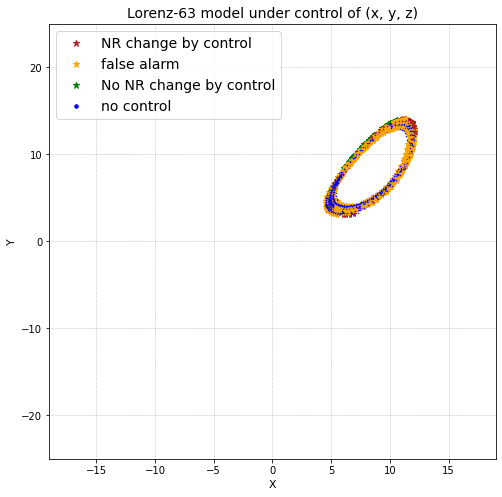

In [82]:
fig = plt.figure(figsize = (8,8))
ticks = np.arange(0, experiment_step*acyc_step)

for i in ticks: 
    if i not in perturbed_time:
        plt.plot(evo_history[0, i], evo_history[1, i], linestyle = 'None', marker = '.', markersize = 1, color = 'blue')
    else:
        if i in success_perturbed_time:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'firebrick')
        elif i in false_alarm_perturbed_time:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'orange')
        else:
            plt.plot(evo_history[0, int(i+0.000001)], evo_history[1, int(i+0.000001)], linestyle = 'None', marker = '*', markersize = 5, color = 'green')    

plt.xlabel('X', fontsize =11)
plt.ylabel('Y', fontsize =11)
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='firebrick', label = 'NR change by control')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='orange', label = 'false alarm')
plt.plot([],[], marker = '*', linestyle = 'None', markersize = 7,color  ='green', label = 'No NR change by control')
plt.plot([],[], marker = '.', linestyle = 'None', markersize = 7,color  ='blue', label = 'no control')
plt.xlim(-19,19)
plt.ylim(-25,25)
plt.legend(loc = 'best', fontsize = 14)
plt.title('Lorenz-63 model under control of (x, y, z)',fontsize = 14)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.savefig('Lorenz63_under_control_2d_da_%s_steps_%s_amp_%s_x_y_z'%(acyc_step, position, 5_100), bbox_inches = 'tight')
plt.show()

In [23]:
no_control = smd.run(evo_history[:,0],np.arange(0,80,0.01),np.arange(0,80,0.01))
no_control = no_control.y


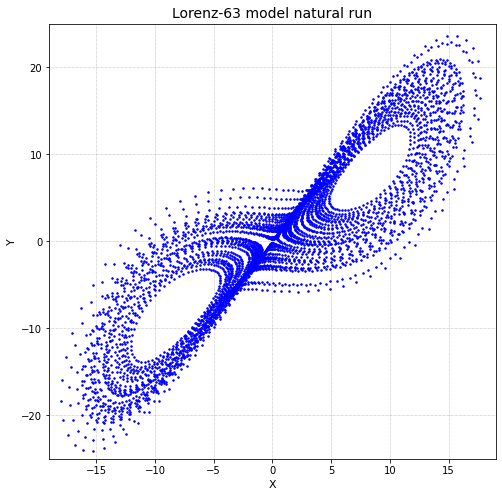

In [41]:
fig = plt.figure(figsize = (8,8))
plt.plot(no_control[0, 0:5000], no_control[1, 0:5000],linestyle = 'None', marker ='.', markersize =3, color = 'blue')
plt.xlabel('X', fontsize =11)
plt.ylabel('Y', fontsize =11)
plt.xlim(-19,19)
plt.ylim(-25,25)
plt.title('Lorenz-63 model natural run',fontsize = 14)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
plt.savefig('Lorenz63_without_control_2d', bbox_inches = 'tight')
plt.show()

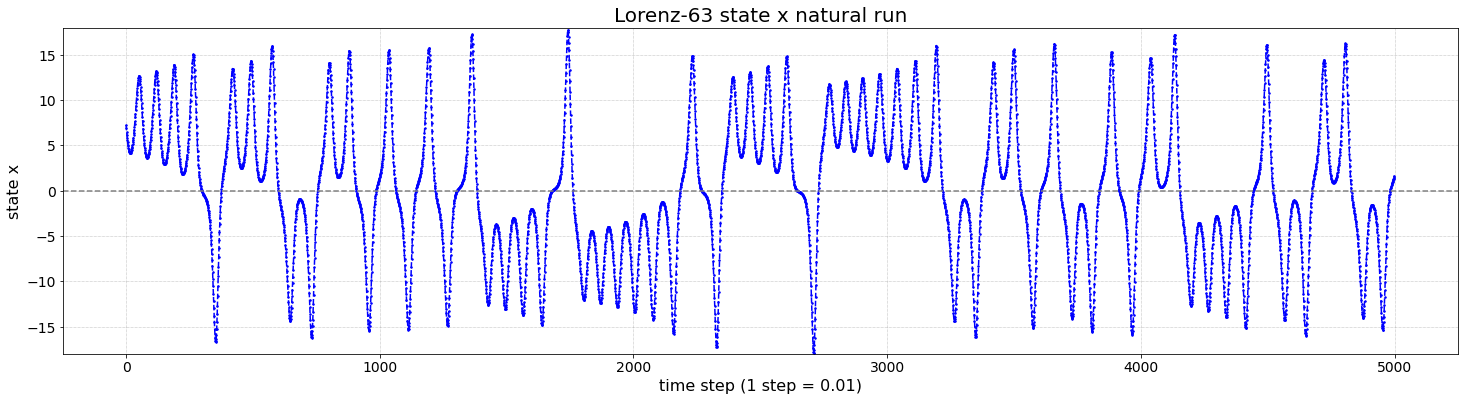

In [42]:
plt.figure(figsize = (25,6))
plt.plot(no_control[0, 0:5000], linestyle = 'dashed',marker='.', markersize = 3, color = 'blue')
plt.axhline(y=0, linestyle='dashed', color = 'grey')
plt.xlabel('time step (1 step = 0.01)', fontsize = 16)
plt.ylabel('state x', fontsize = 16)
plt.title('Lorenz-63 state x natural run', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-18,18)
plt.grid(color = 'grey', linestyle = ':', linewidth = 0.5)
#plt.text(0,-5, 'Observe every %s steps'%(acyc_step),fontsize = 15)
#plt.text(0,-10, 'forcast %s steps'%(position),fontsize = 15)
#plt.text(0,-15, 'amplitude of perturbation %g'%(1/amp),fontsize = 15)
#plt.text(1500,-5, 'false alarm %s / %s'%(fa, experiment_step),fontsize = 15)
#plt.text(1500,-10, 'undetect change %s / %s'%(uch, experiment_step),fontsize = 15)
plt.savefig('lorenz63_without_control_x',bbox_inches = 'tight')
plt.show()